In [ ]:
# Project Documentation URL : https://towardsdatascience.com/the-simplest-data-science-project-using-pandas-matplotlib-9d7042e7ce6f

In [16]:
import sys
sys.path.insert(1, './lib/python3.7/site-packages')
import pandas as pd
import numpy as np
import googletrans
import matplotlib.pyplot as plt; plt.rcdefaults()

In [17]:
df=pd.read_csv("amazon.csv", encoding='ISO-8859-1', thousands = '.')
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01


In [18]:
df.describe(include="all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [19]:
df.isna().sum() # count all the empty blocks in the columns

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [20]:
df.isna() # Will print true if any of the block doesn't contain any value

,year,state,month,number,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6449,False,False,False,False,False
6450,False,False,False,False,False
6451,False,False,False,False,False
6452,False,False,False,False,False


In [21]:
df.loc[147] # number has been converted in thousands

year            2005
state           Acre
month         Agosto
number          4198
date      2005-01-01
Name: 147, dtype: object

In [22]:
df = df.replace(0,np.nan)
data = df.dropna(subset=['number'])

In [23]:
data.describe(include='all')

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [24]:
forest_fire_per_month = data.groupby('month')['number'].sum()
print(forest_fire_per_month)

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64


In [25]:
months_unique = list(data.month.unique())
print(months_unique)

['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']


In [26]:
forest_fire_per_month = forest_fire_per_month.reindex(months_unique,axis=0)
print(forest_fire_per_month)
print(type(forest_fire_per_month))

month
Janeiro        52587.0
Fevereiro      30952.0
Março          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64
<class 'pandas.core.series.Series'>


In [27]:
forest_fire_per_month = forest_fire_per_month.to_frame()
print(forest_fire_per_month)
print(type(forest_fire_per_month))

              number
month               
Janeiro      52587.0
Fevereiro    30952.0
Março        35118.0
Abril        28364.0
Maio         46083.0
Junho       111405.0
Julho       217620.0
Agosto      740841.0
Setembro   1015925.0
Outubro     629665.0
Novembro    312326.0
Dezembro    152596.0
<class 'pandas.core.frame.DataFrame'>


In [28]:
forest_fire_per_month.head()

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Março,35118.0
Abril,28364.0
Maio,46083.0


In [29]:
forest_fire_per_month.reset_index(level=0, inplace=True)
forest_fire_per_month

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0
5,Junho,111405.0
6,Julho,217620.0
7,Agosto,740841.0
8,Setembro,1015925.0
9,Outubro,629665.0


In [16]:
# Google Translate API
translator = googletrans.Translator()

for month in months_unique:
    detected = translator.detect(month)
    translated = translator.translate(month)
    print(detected)
    print(translated)
    print("...")

Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=January, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=February, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=March, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=April, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=May, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=June, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=July, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=it, confidence=None)
Translated(src=it, dest=en, text=August, pronunciation=None, extra_data="{'

In [30]:
translator2 = googletrans.Translator()
for i,m in enumerate(forest_fire_per_month['month']):
    translated = translator2.translate(m)
    month1 = translated.text
    forest_fire_per_month.at[i,'month'] = month1

# The Plot

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

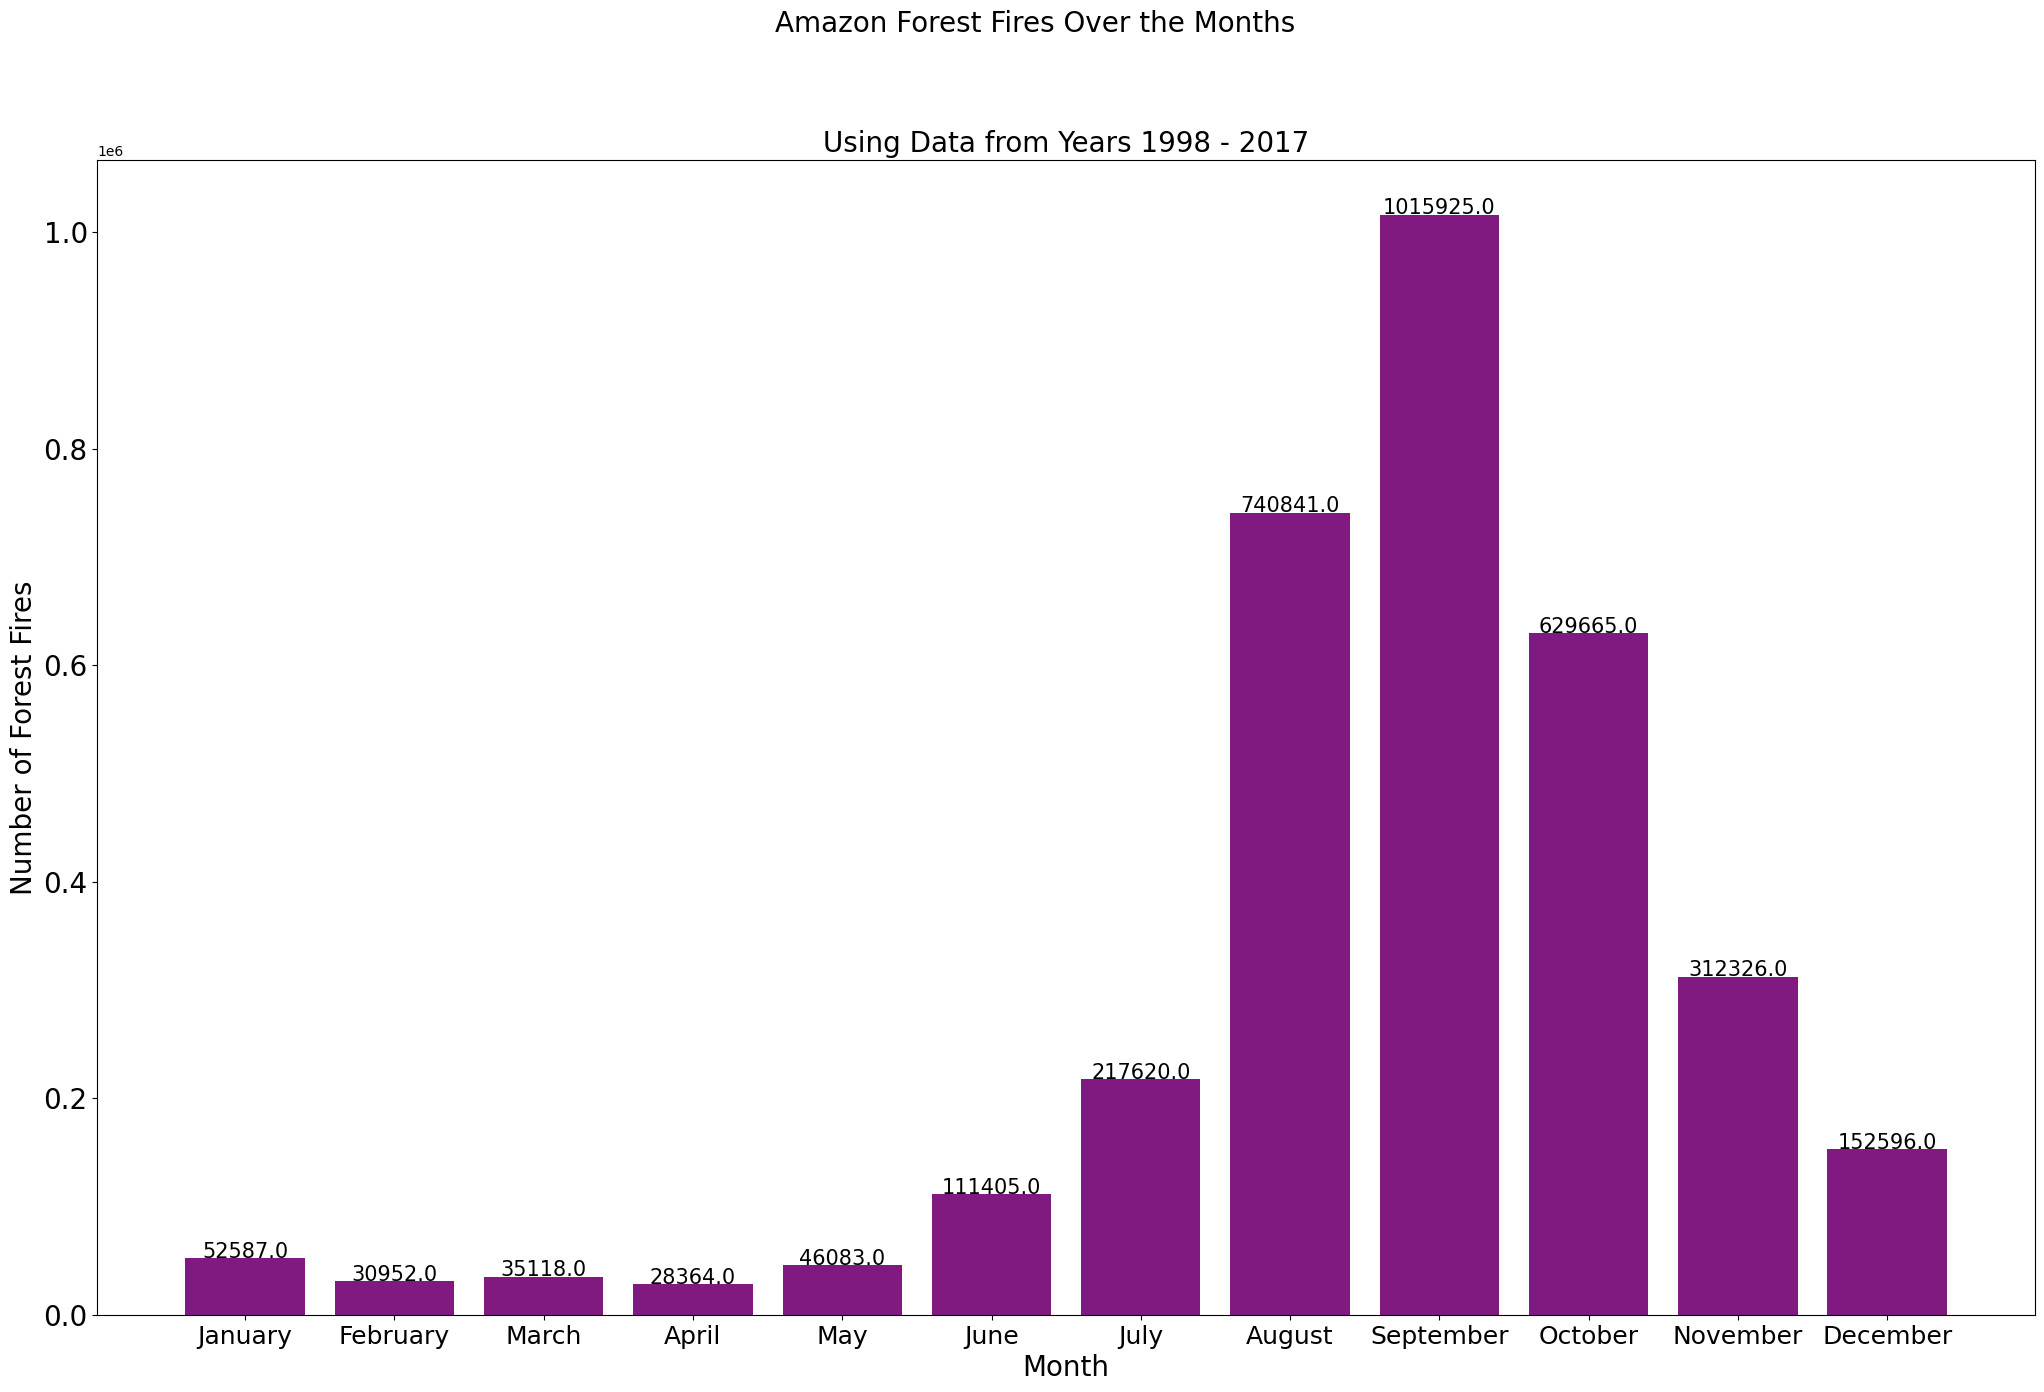

In [34]:
plt.figure(figsize=(25,15))

plt.bar(forest_fire_per_month['month'],forest_fire_per_month['number'],color=(0.5,0.1,0.5))
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20)
plt.title('Using Data from Years 1998 - 2017', fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Number of Forest Fires', fontsize=20)

for i,num in enumerate(forest_fire_per_month['number']):
    #plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)
    plt.text(i,num+500,num,ha='center',fontsize=15)
    
plt.setp(plt.gca().get_xticklabels(),horizontalalignment='center',fontsize=18)
plt.setp(plt.gca().get_yticklabels(),fontsize=20)